# Creating CNN to classify numbers

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [38]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [39]:
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


In [40]:
num_of_samples=[]

In [41]:
cols = 5
num_classes = 10

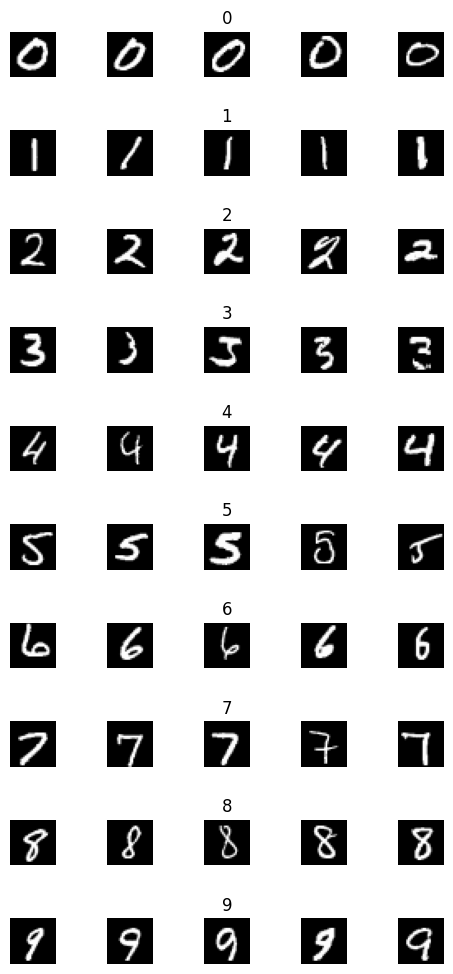

In [42]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


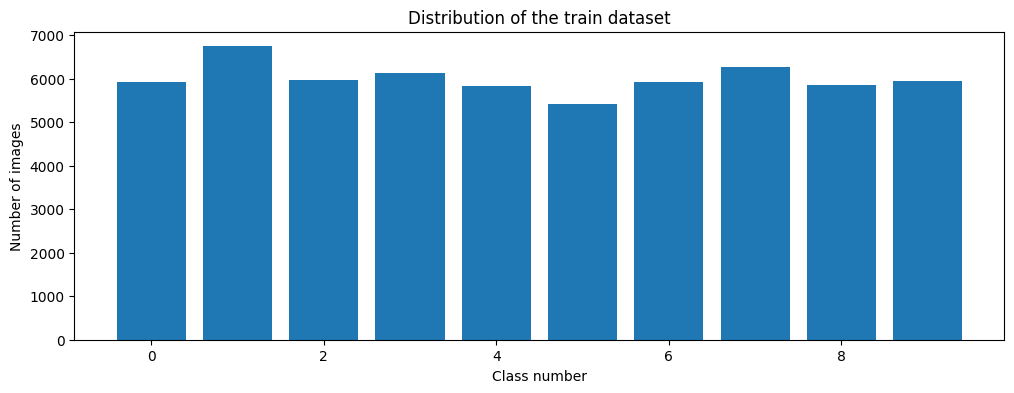

In [43]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [44]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [45]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [46]:
X_train = X_train/255
X_test = X_test/255

In [47]:
#define the leNet_model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [48]:
model = leNet_model()
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [49]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8195 - loss: 0.5397 - val_accuracy: 0.9840 - val_loss: 0.0546
Epoch 2/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9768 - loss: 0.0734 - val_accuracy: 0.9872 - val_loss: 0.0428
Epoch 3/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9800 - loss: 0.0637 - val_accuracy: 0.9887 - val_loss: 0.0400
Epoch 4/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9843 - loss: 0.0520 - val_accuracy: 0.9892 - val_loss: 0.0394
Epoch 5/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9846 - loss: 0.0496 - val_accuracy: 0.9908 - val_loss: 0.0348
Epoch 6/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9866 - loss: 0.0438 - val_accuracy: 0.9875 - val_loss: 0.0422
Epoch 7/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9874 - loss: 0.0413 - val_accuracy: 0.9912 - val_loss: 0.0330
Epoch 8/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9867 - loss: 0.0411 - val_accu

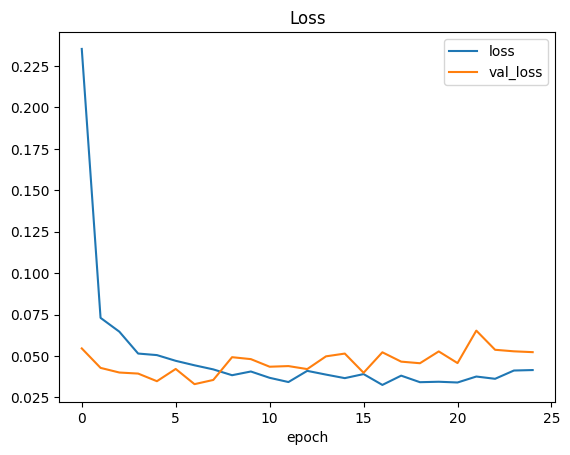

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

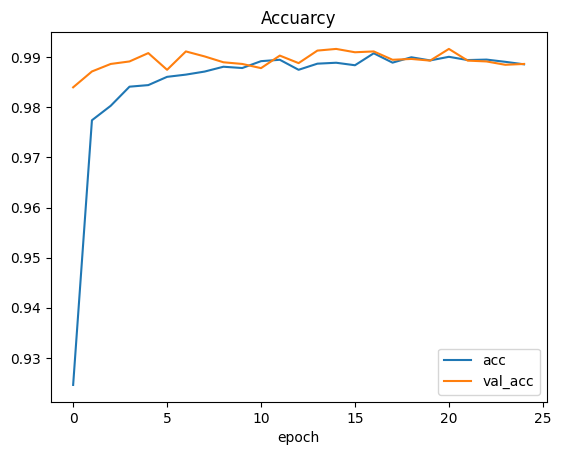

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuarcy')
plt.xlabel('epoch')
plt.show()

<Response [200]>


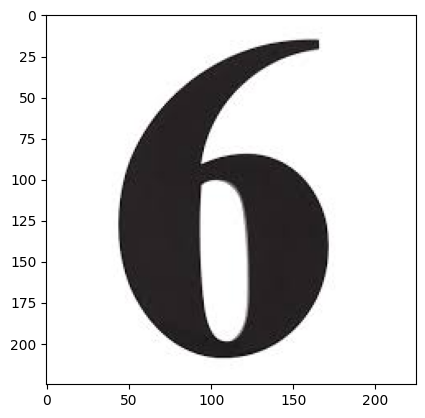

In [52]:
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHmav-cPmrJJfzbyTks9pDApQ9oE1pm2GeZd40qZlpsjmfK7UvVQ6d2zFz6RRtOE1RAL8&usqp=CAU'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)
plt.show()

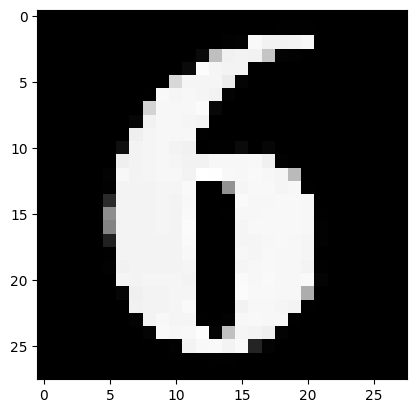

In [53]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
plt.show()

In [54]:
image = image/255
image = image.reshape(1, 28,28,1)
print(image)

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.00392157]
   [0.00392157]
   [0.00392157]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

In [55]:
prediction = np.argmax(model.predict(image), axis=-1)
print("Predicted digit:", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted digit: [6]


In [56]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Tes score: ', score[0])
print('Test accuracy', score[1])

Tes score:  0.06002867594361305
Test accuracy 0.9876000285148621


In [57]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


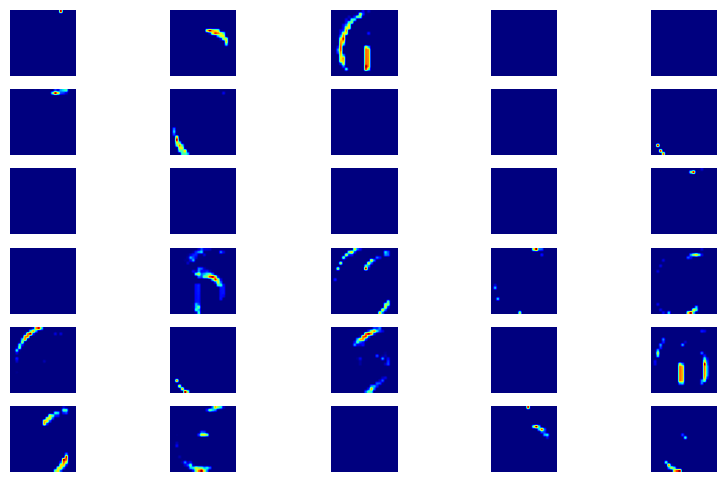

In [58]:
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')


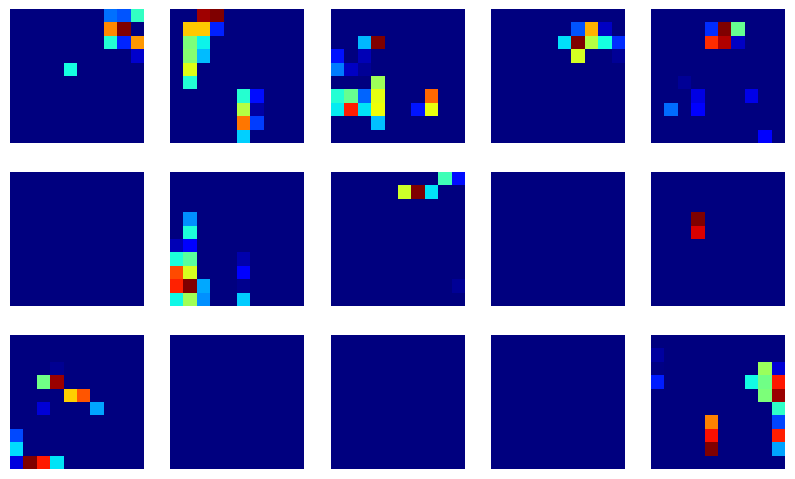

In [59]:
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
